In [2]:
# importing libraries
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)

In [8]:
os.listdir('E:/dataset/BloodPressureDataset')

['part_1.mat',
 'part_10.mat',
 'part_2.mat',
 'part_3.mat',
 'part_4.mat',
 'part_5.mat',
 'part_6.mat',
 'part_7.mat',
 'part_8.mat',
 'part_9.mat',
 'Samples']

In [15]:
# defining our evaluation error function
def rmse(y_true, y_pred):
    """Computes the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [3]:
sample_file = scipy.io.loadmat(f'E:/dataset/BloodPressureDataset/part_{1}.mat')
print(f'sample_file Data type: {type(sample_file)}')
print(f'sample_file keys:\n{sample_file.keys()}')

sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])


We use the scipy.io.loadmat() method to read our sample matlab(.mat) file and store it in the variable sample_file. The scipy.io.loadmat() method reads the matlab file and returns a dict/(dictionary) which is then stored back in the sample_file variable. To prove this, we print the data type of sample_file type(sample_file) as seen in line-2 and bingo it tells us its a dict. 
A dictionary is a data structure that stores data in key, value pairs. For instance; {key1: value1, key2: value2}. What line-3 in the cell above does is to get and return the keys of the sample_file dictionary.

In [5]:
test_sample = scipy.io.loadmat(f'E:/dataset/BloodPressureDataset/part_{1}.mat')['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)


We use the scipy.io.loadmat() method to read our sample matlab(.mat) file and store it in the variable test_sample
The scipy.io.loadmat() method reads the matlab file and this time around returns a numpy ndarray,the%20sizes%20of%20each%20dimension.) (because of the ['p']) which is then stored in the test_sample variable. To prove this, we print the data type of test_sample type(test_sample) as seen in line-2 and bingo it tells us its numpy.ndarray (nd means n-dimensional)
Additionally, we check and print the size/dimensions of test_sample by running test_sample.shape and it prints out (1,1000); this means the array contains 1 row and 1000 columns.

In [6]:
print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

temp_mat = test_sample[0, 999]
temp_length = temp_mat.shape[1]
sample_size = 125


print(temp_length)
print((int)(temp_length/sample_size))

Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 61000
9000
72


In [7]:
sample_size = 125
ppg = []
for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)

In the cell below, I extract BP and ECG signals from the mat file and store them in an array/list.

I additionally extract Systolic blood pressure(SBP) and Diastolic Blood pressure(DBP) from the BP signal.

systole and diastole are two phases of a heart beat. BP increases as the heart muscle contracts during systole, where blood is pushed towards the periphery of the body and it decreases when the heart relaxes to fill with blood during the diastole. Hence we take max(BP) to derive SBP and min(BP) to get DBP. 

In [8]:
ecg = []
bp = []
sbp = [] #Systolic Blood Pressure
dbp = [] #Diastolic Blood Pressue
size = 125 #sample size

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        
        max_value = max(temp_bp)
        min_value = min(temp_bp)
        
        sbp.append(max_value)
        dbp.append(min_value)
        ecg.append(temp_ecg)
        bp.append(temp_bp)

In [9]:
# Reshaping the ecg, ppg and bp signal data into column vectors
ppg, ecg, bp = np.array(ppg).reshape(-1,1), np.array(ecg).reshape(-1,1), np.array(bp).reshape(-1,1)
sbp, dbp = np.array(sbp).reshape(-1,1), np.array(dbp).reshape(-1,1)
print(f'PPG_shape: {ppg.shape}\n ECG_shape: {ecg.shape}\n BP_shape: {bp.shape}')
print(f'Systolic-BP_shape: {sbp.shape},\n Diastolic-BP_shape: {dbp.shape}')

PPG_shape: (32061000, 1)
 ECG_shape: (32061000, 1)
 BP_shape: (32061000, 1)
Systolic-BP_shape: (256488, 1),
 Diastolic-BP_shape: (256488, 1)


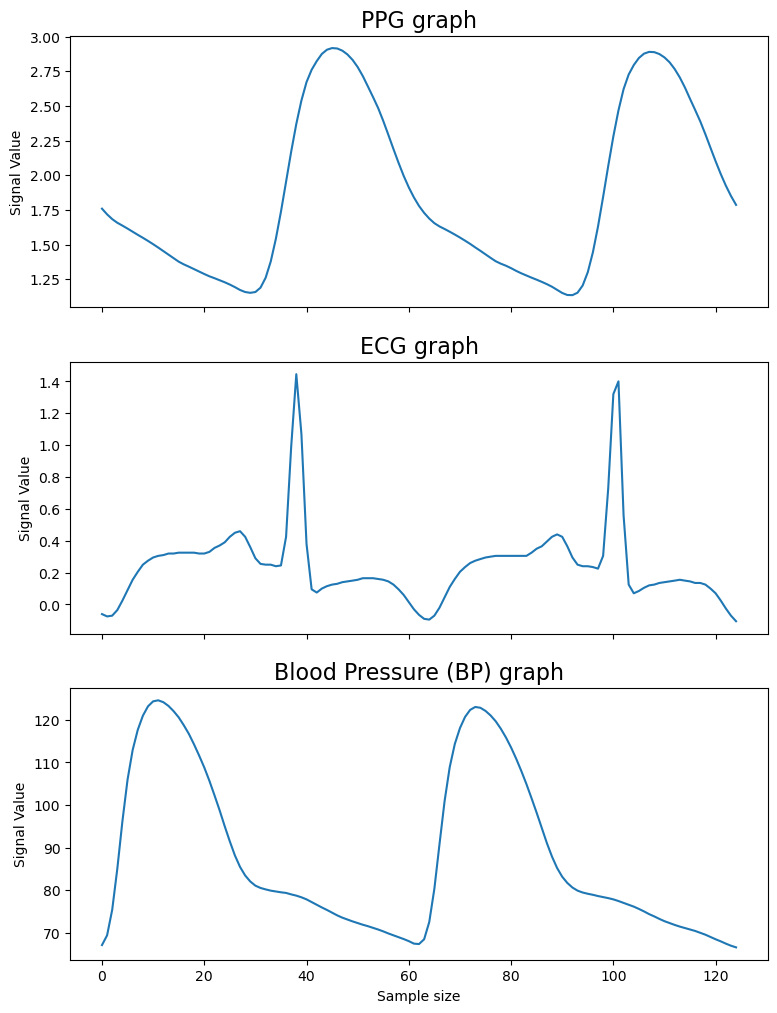

In [10]:
##plotting sample ppg, ecg and bp signals
##using a sample size of 125
fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ppg[:125])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(ecg[:125])

ax[2].set_title('Blood Pressure (BP) graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Sample size')
ax[2].plot(bp[:125])

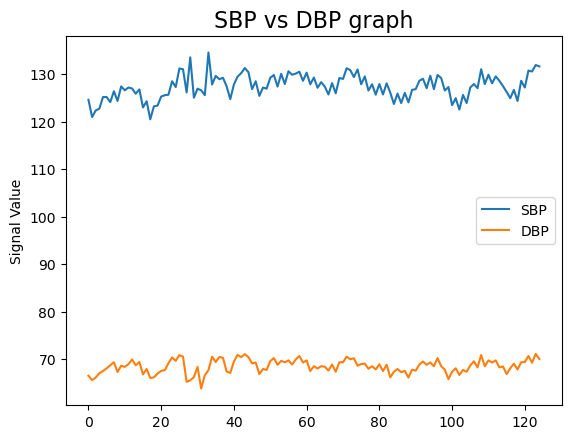

In [11]:
## Visualizing SBP and DBP
#fig, ax = plt.subplots(1,1, figsize=(9,12))

plt.title('SBP vs DBP graph', fontsize=16)
plt.ylabel('Signal Value')
plt.plot(sbp[:125])
plt.plot(dbp[:125])
plt.legend(['SBP', 'DBP'])

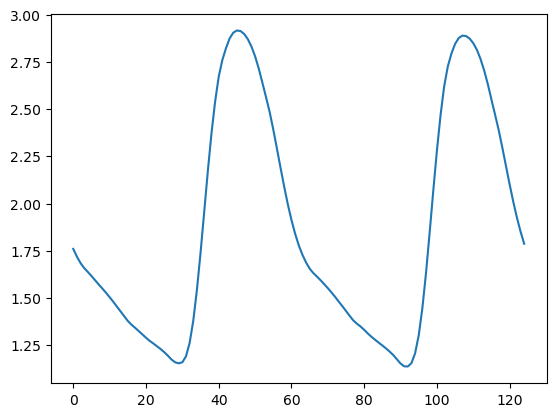

In [12]:
plt.plot(ppg[:125].squeeze())

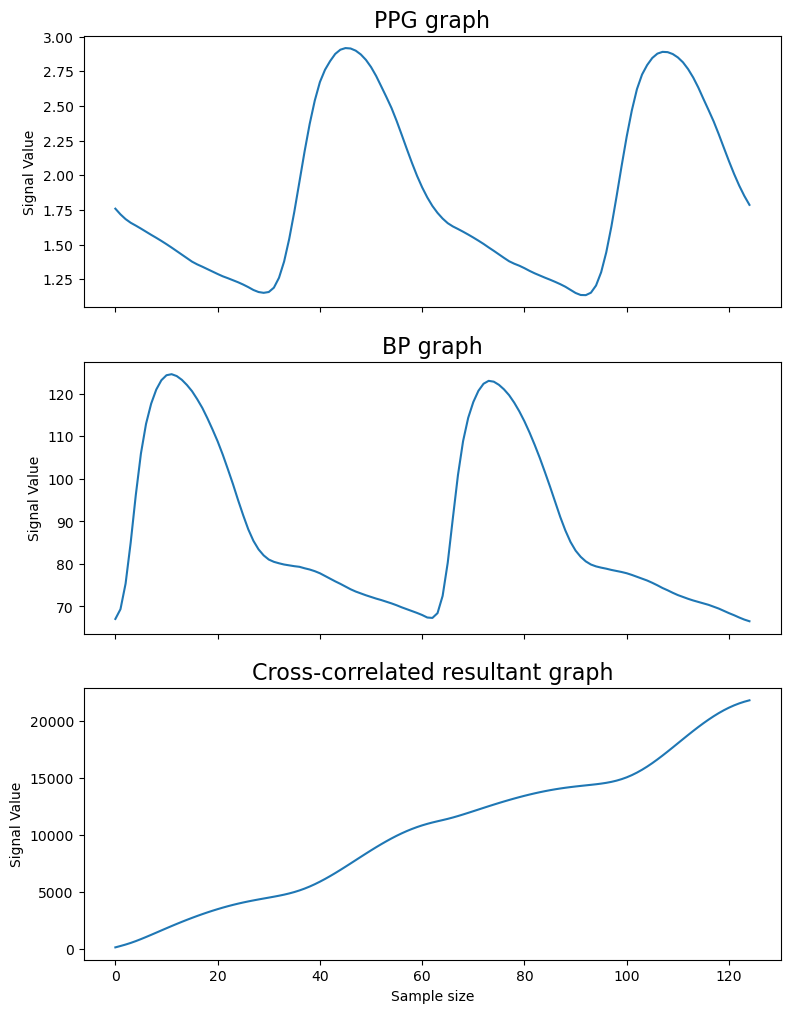

In [13]:
# Computing the cross correlation of ppg and bp signals
cross_corr = np.convolve(ppg[:125].squeeze(), bp[:125].squeeze(), mode='full')

fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)

ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(ppg[:125])

ax[1].set_title('BP graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(bp[:125])

ax[2].set_title('Cross-correlated resultant graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Sample size')
ax[2].plot(cross_corr[:125])

Are PPG signals Discrete Cosine Transform (DCT) of BP signals?

Lets assume that BP is dct(PPG) or that BP is a discrete cosine transform of PPG and try to prove this hypothesis using the root mean squared error as our evaluation function.

In [16]:
#Computing the discrete cosine transform (DCT)
cosine_transformed_array = dct(ppg)
error = rmse(bp.squeeze(), cosine_transformed_array.squeeze())
print(f'RMSE: {error}')

RMSE: 92.6029607182544


In [17]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(ppg, bp, test_size=0.30)

In [18]:
#Kfold cross-validation
folds = KFold(n_splits=5, shuffle=False)
scores = []
for i, (train_index, val_index) in enumerate(folds.split(X_train, y_train)):
    train_data, target = X_train[train_index], y_train[train_index]
    validation_data, val_target = X_train[val_index], y_train[val_index]
    
    model = LinearRegression()
    model.fit(train_data, target)
    #model = RandomForestRegressor(n_estimators=50,max_depth=5, n_jobs=-1, random_state=42)
    #model.fit(train_data[:100000], target[:100000].squeeze())  # training on few samples to save time.
    val_predictions = model.predict(validation_data)
    error = rmse(val_target, val_predictions)
    scores.append(error)
    print(f'Fold {i} RMSE: {error}')
print(f'Average RMSE over 5 folds: {np.mean(scores)}')

Fold 0 RMSE: 27.3533083270073
Fold 1 RMSE: 27.34254108847127
Fold 2 RMSE: 27.330214298886617
Fold 3 RMSE: 27.32491030391144
Fold 4 RMSE: 27.35237967484076
Average RMSE over 5 folds: 27.340670738623476


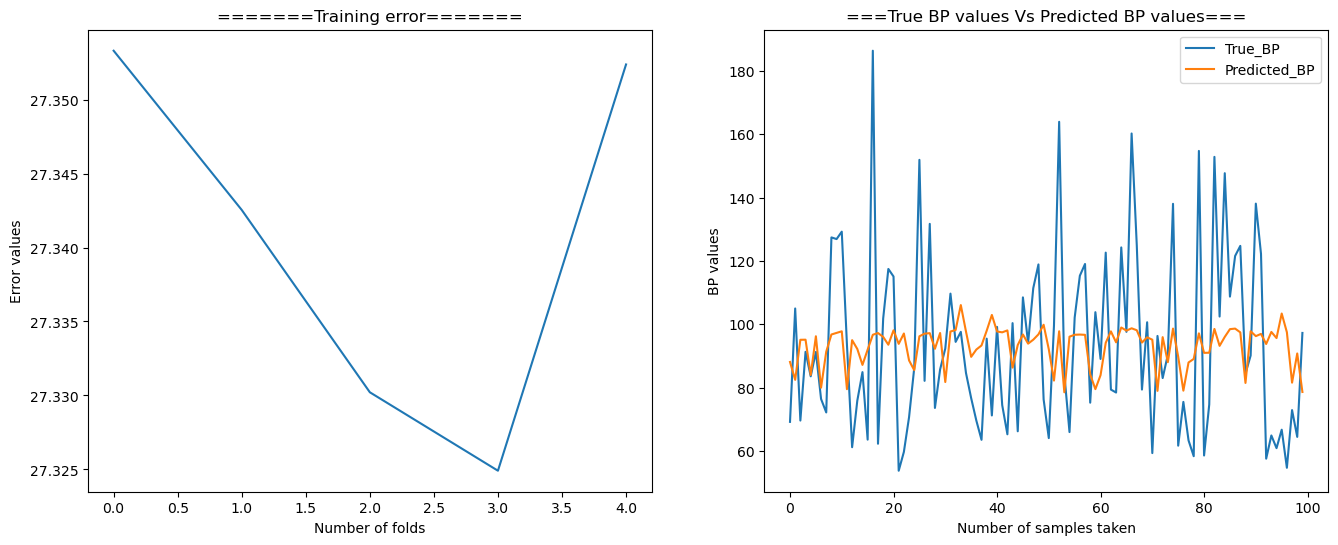

In [19]:
# Visualizing train error.
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title("=======Training error=======")
ax[0].set_xlabel('Number of folds')
ax[0].set_ylabel('Error values')
ax[0].plot(scores)

# Visualize predicted BP and the True BP
ax[1].set_title("===True BP values Vs Predicted BP values===")
ax[1].set_xlabel('Number of samples taken')
ax[1].set_ylabel('BP values')
ax[1].plot(val_target[:100]) #only plotting 100 samples
ax[1].plot(val_predictions[:100])
ax[1].legend(['True_BP', 'Predicted_BP'])

In [20]:
# Predicting on the test set
test_predictions = model.predict(X_test[:1000000]) #predicting on the first 1million rows for speed.
test_error = rmse(y_test[:1000000], test_predictions)
print(f'Error on test set predictions: {test_error}')

Error on test set predictions: 27.34496956373483


Predicting Blood Pressure using Deep Learning

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [42]:
def Model(input_dim, activation, num_class):
    model = Sequential()

    model.add(Dense(1024, input_dim = input_dim))
    model.add(Activation(activation))
    model.add(Dropout(0.5))

    model.add(Dense(512)) 
    model.add(Activation(activation))
    model.add(Dropout(0.5))

    model.add(Dense(64))    
    model.add(Activation(activation))
    model.add(Dropout(0.25))

    model.add(Dense(num_class))    
    model.add(Activation('sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['mse']
                 )
    return model

In [43]:
input_dim = X_train.shape[1]
activation = 'relu'
classes = 1
model = Model(input_dim=input_dim, activation=activation, num_class=classes)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 1024)                │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,745 (2.14 MB)

 Trainable params: 559,745 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Training the model
history = model.fit(X_train[:1000000], # using the first 1million rows for speed.
                    y_train[:1000000].squeeze(),
                    epochs=20,
                    batch_size=128,
                    verbose = 1
                   )

Epoch 1/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - loss: -2399039389696.0000 - mse: 8983.1855
Epoch 2/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - loss: -94199798038528.0000 - mse: 8986.4629
Epoch 3/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - loss: -579449472942080.0000 - mse: 8980.1016
Epoch 4/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - loss: -1935339241340928.0000 - mse: 8980.9014
Epoch 5/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: -4802598070648832.0000 - mse: 8980.6602
Epoch 6/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: -9984170096852992.0000 - mse: 8993.5811
Epoch 7/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - loss: -18427501348913152.0000 - mse: 8985.5693
Epoch 8/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - loss: -31274270369775616.0000 - mse: 8982.9248
Epoch 9/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - loss: -49792281712001024.0000 - mse: 8995.7441
Epoch 10/20
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - loss: -75338674174

In [48]:
#Predicting on the test set using the nn(neural network) model
nn_predictions = model.predict(X_test[:1000000])
error = rmse(y_test[:1000000], nn_predictions)
print(f'Neural Net RMSE: {error}')

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 27s 852us/step
Neural Net RMSE: 94.7461104460669


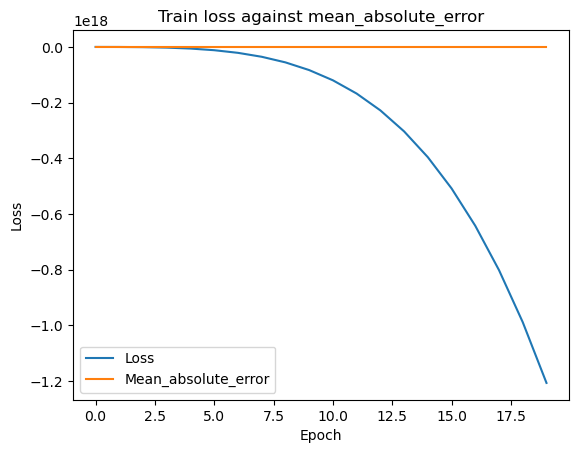

In [49]:
plt.title('Train loss against mean_absolute_error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.legend(['Loss', 'Mean_absolute_error'])

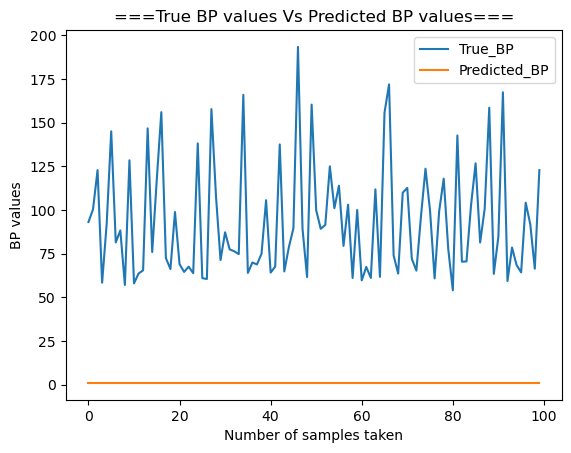

In [50]:
# Visualize predicted BP and the True BP
plt.title("===True BP values Vs Predicted BP values===")
plt.xlabel('Number of samples taken')
plt.ylabel('BP values')
plt.plot(y_test[:100]) #only plotting 100 samples
plt.plot(nn_predictions[:100])
plt.legend(['True_BP', 'Predicted_BP'])

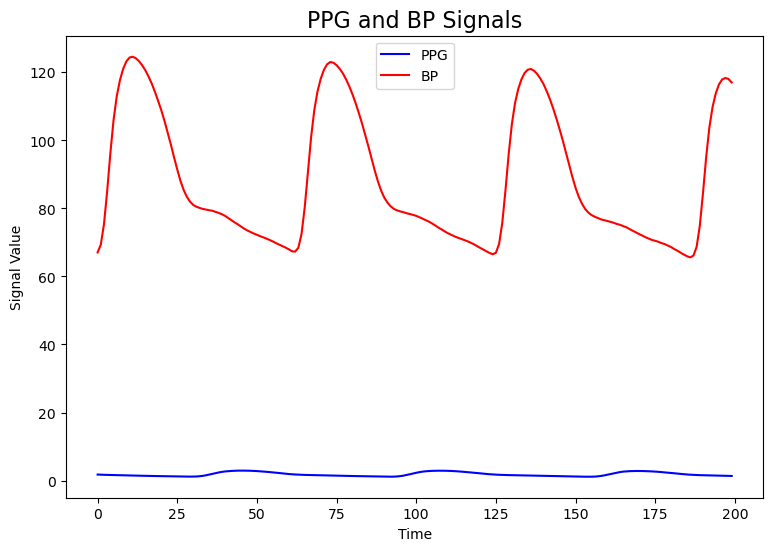

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming ppg and bp are numpy arrays containing your signals

cross_corr = np.convolve(ppg[:500].squeeze(), bp[:125].squeeze(), mode='full')

fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.set_title('PPG and BP Signals', fontsize=16)
ax.set_ylabel('Signal Value')
ax.set_xlabel('Time')

# Plot PPG and BP signals on the same graph
ax.plot(ppg[:200], label='PPG', color='blue')
ax.plot(bp[:200], label='BP', color='red')

# Adding a legend to differentiate the signals
ax.legend()

plt.show()